# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Data

In [2]:
from IPython.display import clear_output

from djimaging.user.alpha.utils import database

indicator = 'calcium'
database.connect_dj(indicator=indicator)
clear_output()

In [3]:
rf_morph_tab, rf_tab, morph_tab, cells = database.get_rf_and_morph_tab(roi_kind='soma', quality_filter=True)

Found 1 RFs for {'experimenter': 'Ran', 'date': datetime.date(2018, 6, 10), 'exp_num': 1}
Found 2 RFs for {'experimenter': 'Ran', 'date': datetime.date(2020, 5, 10), 'exp_num': 1}
Found 2 RFs for {'experimenter': 'Ran', 'date': datetime.date(2020, 5, 10), 'exp_num': 2}
Found 2 RFs for {'experimenter': 'Ran', 'date': datetime.date(2020, 5, 11), 'exp_num': 1}
Found 2 RFs for {'experimenter': 'Ran', 'date': datetime.date(2020, 5, 11), 'exp_num': 2}
Found 2 RFs for {'experimenter': 'Ran', 'date': datetime.date(2020, 6, 7), 'exp_num': 1}
Found 2 RFs for {'experimenter': 'Ran', 'date': datetime.date(2020, 6, 8), 'exp_num': 1}
Found 2 RFs for {'experimenter': 'Ran', 'date': datetime.date(2020, 6, 8), 'exp_num': 2}
Found 2 RFs for {'experimenter': 'Ran', 'date': datetime.date(2020, 6, 21), 'exp_num': 1}
Found 3 RFs for {'experimenter': 'Ran', 'date': datetime.date(2020, 7, 8), 'exp_num': 1}
Found 2 RFs for {'experimenter': 'Ran', 'date': datetime.date(2020, 7, 13), 'exp_num': 1}
Found 2 RFs fo

In [4]:
# Number if cells with rf / morph / both
len(rf_tab.proj()), len(morph_tab.proj()), len(rf_morph_tab.proj())

(16, 17, 16)

# Select data

# Plot

In [5]:
from alphaanalysis import plot as plota

plota.set_default_params(kind='paper')

In [6]:
FIGURE_FOLDER = './figures/'

In [7]:
morph_cdia_name = 'hull_cdia_um'
rf_cdia_name = 'rf_cdia_um'
rf_surround_name = 'surround_index'

In [8]:
columns = ['group', rf_cdia_name, morph_cdia_name, rf_surround_name, 'temporal_nasal_pos', 'ventral_dorsal_pos']
df_soma = pd.DataFrame(rf_morph_tab.fetch(*columns, as_dict=True))
df_soma['rf_dend_ratio'] = df_soma[rf_cdia_name] / df_soma[morph_cdia_name]
df_soma

,rf_cdia_um,surround_index,ventral_dorsal_pos,temporal_nasal_pos,hull_cdia_um,group,rf_dend_ratio
0,192.038,-0.292124,0.395487,-0.135451,264.812,d,0.725186
1,173.741,-0.043811,0.771130,-0.146780,253.046,d,0.686598
2,137.854,-0.339407,0.611120,-0.279482,275.391,d,0.500576
3,149.634,-0.060844,-0.062890,-0.780390,181.494,t,0.824457
4,170.341,-0.018505,-0.010298,-0.512150,200.172,t,0.850973
5,193.676,-0.022506,0.694612,-0.232471,352.288,d,0.549766
6,206.067,0.050969,0.118481,0.982117,288.500,n,0.714270
7,190.046,0.045549,0.516465,0.802891,331.512,n,0.573270
8,177.046,0.010039,-0.541127,0.187739,322.951,n,0.548213
9,189.578,-0.002131,-0.051573,0.696769,374.994,n,0.505549


In [9]:
columns = ['group', 'hull_cdia_um', 'temporal_nasal_pos', 'ventral_dorsal_pos']
df_morph = pd.DataFrame((morph_tab).fetch(*columns, as_dict=True))
df_morph

,ventral_dorsal_pos,temporal_nasal_pos,hull_cdia_um,group
0,0.395487,-0.135451,264.812,d
1,0.771130,-0.146780,253.046,d
2,0.611120,-0.279482,275.391,d
3,-0.062890,-0.780390,181.494,t
4,-0.010298,-0.512150,200.172,t
5,0.694612,-0.232471,352.288,d
6,0.118481,0.982117,288.500,n
7,0.516465,0.802891,331.512,n
8,-0.541127,0.187739,322.951,n
9,0.719969,0.070591,314.480,d


# Statistic

In [10]:
from scipy.stats import kruskal
import scikit_posthocs as sp

In [11]:
def multi_comparison(df, col, group_col='group', plot=True):
    df_groups = df.groupby(group_col)
    n_groups = len(df_groups)

    statistic, p_value = kruskal(*[df_group[col] for (group, df_group) in df_groups])

    if p_value >= 0.05:
        return None

    ph = sp.posthoc_dunn(df, val_col=col, group_col='group', p_adjust='fdr_bh')
    if plot:
        heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True,
                        'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
        sp.sign_plot(ph, **heatmap_args)

    return ph

,d,n,t
d,1.000000,0.337406,0.036055
n,0.337406,1.000000,0.002232
t,0.036055,0.002232,1.000000


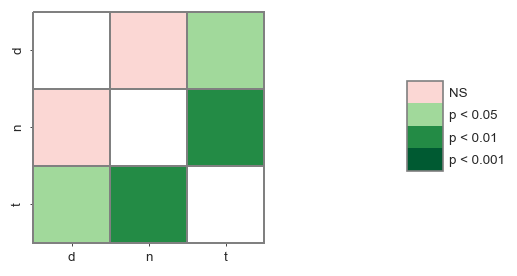

In [12]:
multi_comparison(df=df_morph, col=morph_cdia_name)

,d,n,t
d,1.000000,0.342585,0.164444
n,0.342585,1.000000,0.013124
t,0.164444,0.013124,1.000000


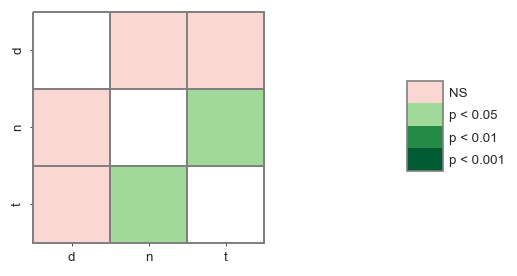

In [13]:
multi_comparison(df=df_soma, col=rf_cdia_name)

,d,n,t
d,1.000000,0.892152,0.017513
n,0.892152,1.000000,0.008903
t,0.017513,0.008903,1.000000


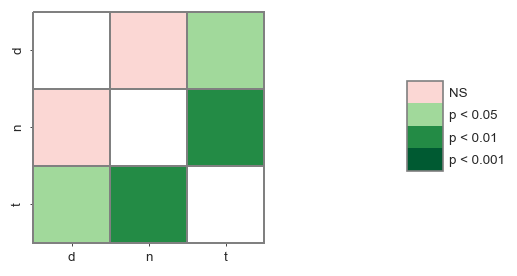

In [14]:
multi_comparison(df=df_soma, col='rf_dend_ratio')

In [15]:
def p_value_to_plot(p_value):
    if p_value >= 0.05:
        return ""
    elif p_value < 0.001:
        return "***"
    elif p_value < 0.01:
        return "**"
    elif p_value < 0.05:
        return "*"
    else:
        return ""


def plot_test(ax, df, x, y, ylabel, palette, order, marker='o', plot_stats=True,
              test='auto-independent', comparisons_correction=None, ms=5):
    order = [xi for xi in order if any(df[x] == xi)]

    sns.boxplot(ax=ax, data=df, x=x, y=y, palette=palette, order=order,
                showmeans=True, meanline=True,
                meanprops={'color': 'k', 'ls': '-', 'lw': 2},
                medianprops={'visible': False}, whiskerprops={'visible': False},
                showfliers=False, showbox=False, showcaps=False)

    y_min, y_max = np.min(df[y]), np.max(df[y])
    y_rng = y_max - y_min
    ax.set_ylim(np.min(df[y]) - 0.05 * y_rng, np.max(df[y]) + 0.05 * y_rng)

    sns.swarmplot(ax=ax, data=df, x=x, y=y, palette=palette, order=order, s=ms, edgecolor='k', linewidth=0.5, alpha=0.9,
                  marker=marker, clip_on=False)

    # Test stats
    ph_test = multi_comparison(df=df, col=y, group_col=x, plot=False)

    if len(order) == 3:
        pairs = [(order[0], order[1]), (order[1], order[2]), (order[0], order[2])]
    else:
        pairs = [(l1, l2)
                 for i1, l1 in enumerate(order)
                 for i2, l2 in enumerate(order[i1 + 1:], start=i1 + 1)]

    # Plot test stats
    dx = 1 / 6
    dx_space = 0.
    dy = 0.1

    for ij, (gi, gj) in enumerate(pairs, start=1):
        i = np.argmax(np.array(order) == gi)
        j = np.argmax(np.array(order) == gj)
        p_adjust = ph_test.loc[gi, gj]

        ax.plot([i + dx_space, j - dx_space], [y_max + ij * dy * y_rng] * 2, c='dimgray', clip_on=False)
        ax.text(np.mean([i, j]), y_max + (ij + 0.75) * dy * y_rng, p_value_to_plot(p_adjust), clip_on=False,
                ha='center', va='top', color='dimgray')

        print(f'{y}: {gi} vs. {gj}, p_adjust={p_adjust:.2g}')

    ax.set(xlabel=None, ylabel=ylabel)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', which='both', length=0)

hull_cdia_um: n vs. d, p_adjust=0.34
hull_cdia_um: d vs. t, p_adjust=0.036
hull_cdia_um: n vs. t, p_adjust=0.0022
rf_cdia_um: n vs. d, p_adjust=0.34
rf_cdia_um: d vs. t, p_adjust=0.16
rf_cdia_um: n vs. t, p_adjust=0.013
rf_dend_ratio: n vs. d, p_adjust=0.89
rf_dend_ratio: d vs. t, p_adjust=0.018
rf_dend_ratio: n vs. t, p_adjust=0.0089


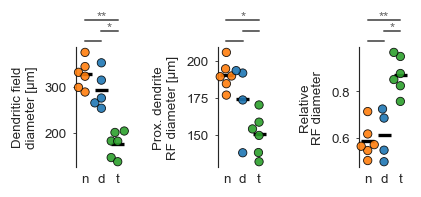

In [19]:
import warnings

warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

order = plota.get_order(indicator=indicator)
palette = plota.get_palette(indicator=indicator)

fig, axs = plota.subplots(1, 3, figsize=(3.55, 1.8), gridspec_kw=dict(width_ratios=(1, 1, 1)))

plot_test(ax=axs[0], df=df_morph, x='group', y=morph_cdia_name, ylabel='Dendritic field\ndiameter [µm]', order=order,
          palette=palette, test='dunn', comparisons_correction=None)
plot_test(ax=axs[1], df=df_soma, x='group', y=rf_cdia_name, ylabel='Prox. dendrite\nRF diameter [µm]', order=order,
          palette=palette)
plot_test(ax=axs[2], df=df_soma, x='group', y='rf_dend_ratio', ylabel='Relative\nRF diameter', order=order,
          palette=palette)

plt.tight_layout(w_pad=2)

for ax in axs:
    ax.set_facecolor('none')
plt.savefig('figures/soma_rf_stats.pdf', bbox_inches='tight', facecolor='none')
plt.show()